# One vs all heat map

## Imports

In [1]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Load data

In [24]:
RESULTS_PATH='../../data/fine_tuned/results/one_vs_each.json'

In [30]:
models = ['gemini-pro', 'gpt-4-turbo-preview', 'gpt-3.5-turbo-0125', 'mistralai-mixtral-8x7b-instruct-v0.1', 'bigscience-bloomz-7b1', 'meta-llama-llama-2-7b-chat-hf', 'chavinlo-alpaca-13b']
sorted_models = models[:].sort()
json_data = None
with open(RESULTS_PATH, 'r', encoding='utf-8') as f:
    json_data = json.load(f)
    

In [46]:
heatmap_data = {model: [] for model in models}

for data in json_data:
    # Extract the 'results_against_itself' test accuracy (last element)
    test_acc_itself = data["results_against_itself"]["test_acc"][-1]

    # Extract the 'results_against_all' values (last elements)
    results_against_all = {list(item.keys())[0]: list(item.values())[0][-1] for item in data["results_against_all"]}
    
    # Append the 'results_against_itself' value to the dictionary
    results_against_all['results_against_itself'] = test_acc_itself
    
    # Add the values to the corresponding model in the dictionary
    for model in models:
        heatmap_data[model].append(results_against_all.get(model, float('nan')))

print(heatmap_data)
# Convert the dictionary to a DataFrame
df = pd.DataFrame(heatmap_data, index=models)
df

{'gemini-pro': [0.9921875, 0.6811079545454546, 0.5120738636363636, 0.9723011363636364, 0.3799715909090909, 0.9808238636363636, 0.24573863636363635], 'gpt-4-turbo-preview': [0.9779829545454546, 0.9957386363636364, 0.9850852272727273, 0.9857954545454546, 0.2507102272727273, 0.9382102272727273, 0.23224431818181818], 'gpt-3.5-turbo-0125': [0.9907670454545454, 0.9907670454545454, 0.9978693181818182, 0.9857954545454546, 0.4524147727272727, 0.9879261363636364, 0.2507102272727273], 'mistralai-mixtral-8x7b-instruct-v0.1': [0.9588068181818182, 0.8423295454545454, 0.7748579545454546, 0.984375, 0.34019886363636365, 0.9602272727272727, 0.23508522727272727], 'bigscience-bloomz-7b1': [0.40625, 0.26207386363636365, 0.31605113636363635, 0.4197443181818182, 0.9751420454545454, 0.6079545454545454, 0.3856534090909091], 'meta-llama-llama-2-7b-chat-hf': [0.9829545454545454, 0.78125, 0.6967329545454546, 0.9801136363636364, 0.5447443181818182, 0.9886363636363636, 0.2507102272727273], 'chavinlo-alpaca-13b': [0

,gemini-pro,gpt-4-turbo-preview,gpt-3.5-turbo-0125,mistralai-mixtral-8x7b-instruct-v0.1,bigscience-bloomz-7b1,meta-llama-llama-2-7b-chat-hf,chavinlo-alpaca-13b
gemini-pro,0.992188,0.977983,0.990767,0.958807,0.406250,0.982955,0.686080
gpt-4-turbo-preview,0.681108,0.995739,0.990767,0.842330,0.262074,0.781250,0.519886
gpt-3.5-turbo-0125,0.512074,0.985085,0.997869,0.774858,0.316051,0.696733,0.526989
mistralai-mixtral-8x7b-instruct-v0.1,0.972301,0.985795,0.985795,0.984375,0.419744,0.980114,0.703835
bigscience-bloomz-7b1,0.379972,0.250710,0.452415,0.340199,0.975142,0.544744,0.909801
meta-llama-llama-2-7b-chat-hf,0.980824,0.938210,0.987926,0.960227,0.607955,0.988636,0.701705
chavinlo-alpaca-13b,0.245739,0.232244,0.250710,0.235085,0.385653,0.250710,0.995739


In [47]:
models_to_show = ['gemini-pro', 'bigscience-bloomz-7b1', 'gpt-3.5-turbo-0125']

print(df.index)
df = df.loc[models_to_show, models_to_show]
df.sort_index(inplace=True)
df.sort_index(axis=1,inplace=True)
df

Index(['gemini-pro', 'gpt-4-turbo-preview', 'gpt-3.5-turbo-0125',
       'mistralai-mixtral-8x7b-instruct-v0.1', 'bigscience-bloomz-7b1',
       'meta-llama-llama-2-7b-chat-hf', 'chavinlo-alpaca-13b'],
      dtype='object')


,bigscience-bloomz-7b1,gemini-pro,gpt-3.5-turbo-0125
bigscience-bloomz-7b1,0.975142,0.379972,0.452415
gemini-pro,0.406250,0.992188,0.990767
gpt-3.5-turbo-0125,0.316051,0.512074,0.997869


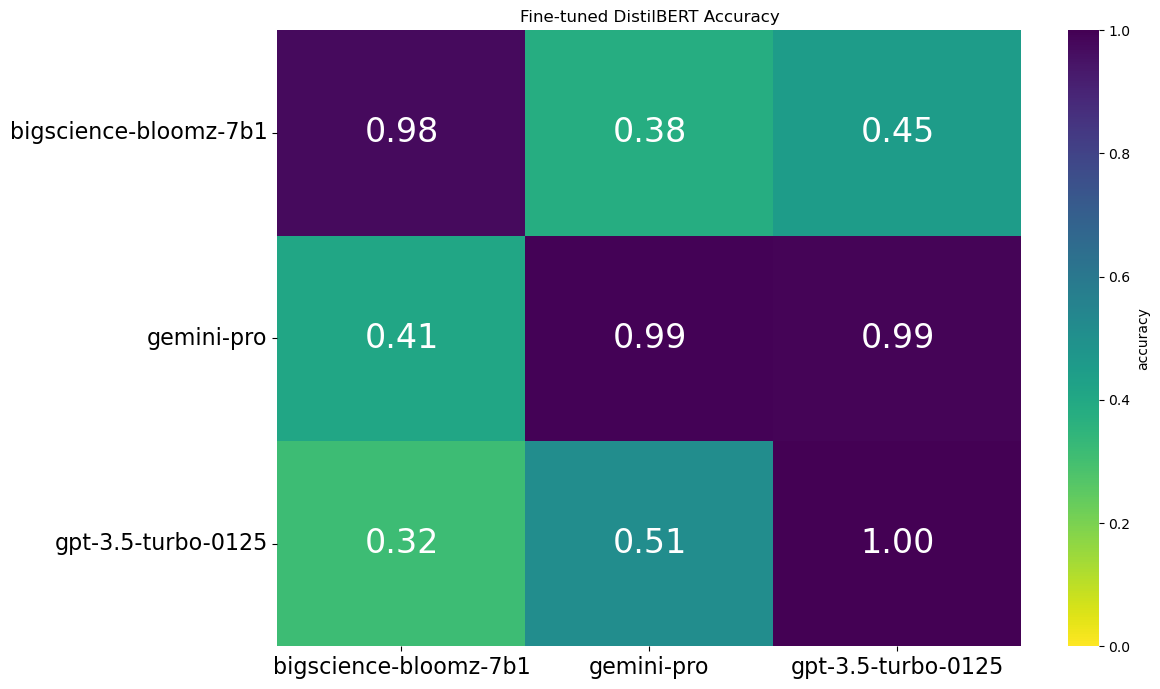

In [85]:

# Sort the DataFrame columns alphabetically

# Plot the heatmap using Seaborn
plt.figure(figsize=(12, 8))
ax = sns.heatmap(df, annot=True, cmap='viridis_r', fmt=".2f", cbar_kws={'label': 'accuracy'}, annot_kws={"size": 24}, vmin=0, vmax=1)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=16)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=16, rotation=0)

plt.title('Fine-tuned DistilBERT Accuracy')
plt.show()